In [1]:
#import jax.numpy as jnp
import numpy as jnp
import matplotlib.pyplot as plt



## Spectral method 
x_lb = 0 
x_rb = 1
d = 2
n = 4
N_x =2**n

# Poissons's equation
#A = jnp.eye(d)

# elliptic with constant coefficient for d = 2
A = jnp.array(
    [
        [3., 1.], 
        [1., 2.]
    ]
)


In [2]:
L = x_rb - x_lb
dx = L/N_x
y_lb = x_lb
y_ub = x_rb
N_y = N_x
xs, ys = jnp.meshgrid(jnp.linspace(x_lb, x_rb, N_x, endpoint=False), 
                    jnp.linspace(y_lb, y_ub, N_y, endpoint=False), 
                    indexing='ij')

In [3]:
xs

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
       [0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 ,
        0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 ],
       [0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875,
        0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  ,
        0.25  , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  ],
       [0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125,
        0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125],
       [0.375 , 0.375 , 0.375 , 0.375 , 0.375 , 0.375 , 0.375 , 0.375 ,
        0.375 , 0.375 , 0.375 , 0.375 , 0.375 , 0.375 , 0.

In [4]:
# classical spectral method
def Elliptic_fft(u, N_x, N_y, dx, A=A): 
    u_h = jnp.fft.rfft2(u)
    wave = jnp.fft.fftfreq(N_x, d= dx) * 2j* jnp.pi
    wave_real = jnp.fft.rfftfreq(N_y, d= dx)* 2j* jnp.pi
    k_x, k_y = jnp.meshgrid(wave, wave_real, indexing='ij')

    u_x_h =  k_x * u_h
    u_xx_h = k_x * u_x_h
    u_yx_h =  k_y * u_x_h
    u_y_h =  k_y * u_h
    u_xy_h =  k_x * u_y_h
    u_yy_h = k_y * u_y_h

    u_xx = jnp.fft.irfft2(u_xx_h, s=(N_x, N_y))
    u_xy = jnp.fft.irfft2(u_xy_h, s=(N_x, N_y))
    u_yy = jnp.fft.irfft2(u_yy_h, s=(N_x, N_y))
    u_yx = jnp.fft.irfft2(u_yx_h, s=(N_x, N_y))

    return A[0, 0] * u_xx + A[0, 1] * u_xy + A[1, 0] * u_yx + A[1, 1] * u_yy

In [5]:
def f(x, y) : 
    return jnp.cos(2*jnp.pi *x) * jnp.sin(-2*jnp.pi * y )
    
#def u(x, y): 
#    return  jnp.cos(2*jnp.pi *x) * jnp.sin(-2*jnp.pi * y )/(-8*jnp.pi**2) 
#
#u_theo = u(xs, ys)
#plt.imshow(f(xs, ys), extent=[x_lb, x_rb, y_lb, y_ub], origin='lower')

In [6]:

"""Constructs the 1D DFT matrix of size N."""
dfmtx = jnp.fft.fft(jnp.eye(N_x))#/jnp.sqrt(N_x)

"""Constructs the 2D DFT matrix of size N x N as a Kronecker product."""
FG = jnp.kron(dfmtx, dfmtx)
GF = jnp.kron(
    (jnp.conj(dfmtx).T)/N_x, 
    (jnp.conj(dfmtx).T)/N_x, 
)

In [7]:
def spectral_eigenvalues(N, L=1.0):
    """Eigenvalues of the 1D derivative operator with periodic condition."""
    k = jnp.fft.fftfreq(N, d=L/N) * 2j * jnp.pi  # frequency vector
    return k  

#def spectral_elliptic_2d_kron(u, L=1.0):
#    N = u.shape[0]
#    A_hat = jnp.fft.fft2(u)
#
#    k2 = spectral_eigenvalues(N, L)
#    Lambda = jnp.diag(k2)
#    Delta_hat = jnp.kron(jnp.eye(N), Lambda) + jnp.kron(Lambda, jnp.eye(N))
#
#    # Apply Laplacian in spectral domain
#    A_hat_vec = A_hat.flatten()
#    result_hat_vec = Delta_hat @ A_hat_vec
#
#    # Inverse FFT
#    result_hat = result_hat_vec.reshape(N, N)
#    result = jnp.real(jnp.fft.ifft2(result_hat))
#
#    return result

In [8]:
# classical 
def f(x, y) : 
    return jnp.cos(2*jnp.pi *x) * jnp.sin(-2*jnp.pi * y )
    
def solver_Elliptic(f): 
    f_values = f(xs, ys)

    f_h = jnp.fft.fft2(f_values)
    wave = jnp.fft.fftfreq(N_x, d= dx) * 2j* jnp.pi
    wave[0] = 1
    wave_real = jnp.fft.fftfreq(N_y, d= dx)* 2j* jnp.pi
    wave_real[0] = 1
    k_x, k_y = jnp.meshgrid(wave, wave_real, indexing='ij')
    

    u_h = f_h/ (A[0,0]*k_x**2 + + A[1, 0]* k_x * k_y + A[0, 1] * k_y *k_x + A[1,1]*k_y**2)

    return jnp.fft.ifft2(u_h, s= (N_x, N_y))

# Kron
def solver_Elliptic_FG(f): 

    # Fourier transform
    f_flatten = f(xs, ys).flatten()
    f_h = FG @ f_flatten

    # Build laplacian in spectral domain
    D = jnp.diag( 
        spectral_eigenvalues(N_x)
    )
    

    Elliptic_spec = A[0,0]*jnp.kron(D**2, jnp.eye(N_x)) + A[0, 1] * jnp.kron(D, D) + A[1, 0] * jnp.kron(D, D) + A[1, 1]*jnp.kron(jnp.eye(N_x), D**2)

    Elliptic_spec[0, 0] = 1 # avoid zero inversion
    inverse_Elliptic = jnp.linalg.inv(Elliptic_spec)


    # Apply Laplacian in spectral domain and Inverse FFT
    u_flatten = GF @ inverse_Elliptic @ f_h

    return u_flatten.reshape(N_x, N_x)

u_spec = solver_Elliptic_FG(f)
u_theo = solver_Elliptic(f)


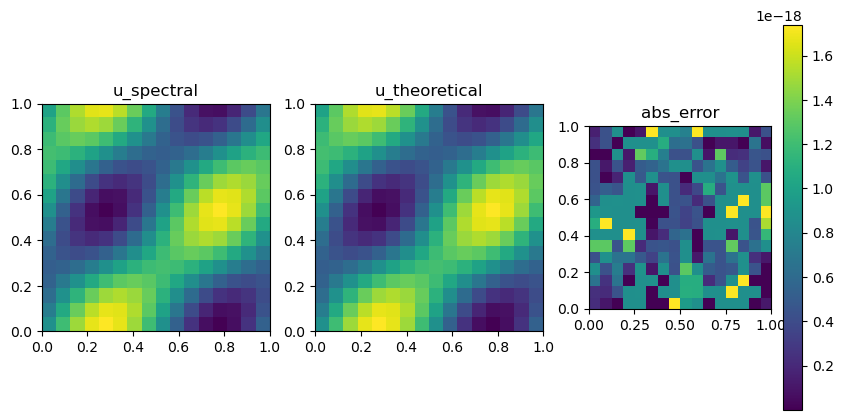

In [9]:


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(u_spec.real, extent=[x_lb, x_rb, y_lb, y_ub], origin='lower')
plt.title("u_spectral")
plt.subplot(1, 3, 2)
plt.imshow(u_theo.real, extent=[x_lb, x_rb, y_lb, y_ub], origin='lower')
plt.title("u_theoretical")
plt.subplot(1, 3, 3)
plt.imshow(abs(u_spec-u_theo), extent=[x_lb, x_rb, y_lb, y_ub], origin='lower')
plt.title("abs_error")
plt.colorbar()


In [10]:
normalized_u_spec = u_spec / jnp.linalg.norm(u_spec)
normalized_u_theo = u_theo/ jnp.linalg.norm(u_theo)
error = jnp.linalg.norm(u_spec - u_theo)/jnp.linalg.norm(u_theo)
error

2.3163634784286594e-16